# Loading Data/ Libraries

In [1]:
# Loading the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Data Preprocessing
### Prosthetic hand EMG sensor files
r_data = pd.read_csv('https://raw.githubusercontent.com/cmrad/handGesturesClassification/master/0.csv',sep = ",", header = None) #rock gesture signals
s_data = pd.read_csv('https://raw.githubusercontent.com/cmrad/handGesturesClassification/master/1.csv', sep = ",", header = None) #scissors gesture signals
p_data = pd.read_csv('https://raw.githubusercontent.com/cmrad/handGesturesClassification/master/2.csv', sep = ",", header = None) #paper gesture signals
ok_data = pd.read_csv('https://raw.githubusercontent.com/cmrad/handGesturesClassification/master/3.csv',sep = ",", header = None) #ok gesture signals

# General Data Information

In [3]:
print(r_data.head())
print("Rock Shape: ",r_data.shape,
      "\nScissor Shape: ",s_data.shape,
      "\nPaper Shape: ",p_data.shape,
      "\nOK Shape: ",ok_data.shape)

     0    1    2    3     4     5      6     7     8    9  ...    55    56  \
0  26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0 ... -28.0  61.0   
1 -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0 ... -25.0  47.0   
2 -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0 ... -83.0   7.0   
3   2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0 ... -38.0 -11.0   
4   6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0 ...  38.0 -35.0   

    57   58    59    60    61     62    63  64  
0  4.0  8.0   5.0   4.0  -7.0  -59.0  16.0   0  
1  6.0  6.0   5.0  13.0  21.0  111.0  15.0   0  
2  7.0  1.0  -8.0   7.0  21.0  114.0  48.0   0  
3  4.0  7.0  11.0  33.0  39.0  119.0  43.0   0  
4 -8.0  2.0   6.0 -13.0 -24.0 -112.0 -69.0   0  

[5 rows x 65 columns]
Rock Shape:  (2910, 65) 
Scissor Shape:  (2903, 65) 
Paper Shape:  (2943, 65) 
OK Shape:  (2922, 65)


# Data Visualization

In [4]:
def plot_sensor(data,name,color):
    color_list=["navy","darkmagenta","red","black"]
    fig, ax = plt.subplots(2,4, figsize=(20,12))
    sns.set(style="white")
    sns.set(style="whitegrid")
    x=0
    for i in range(2):
        for j in range(4):
            plt.suptitle(name)
            #r_data.iloc[:,i].plot.hist(bins=10,ax=ax[i][j],grid=True)
            sns.distplot(data.iloc[:,x],kde=False,ax=ax[i][j],color=color_list[color],bins=15);
            x+=1
            if i==1:
                ax[i][j].set_title("Sensor_"+str(j+5))
            else:
                ax[i][j].set_title("Sensor_"+str(j+1))
    plt.show()

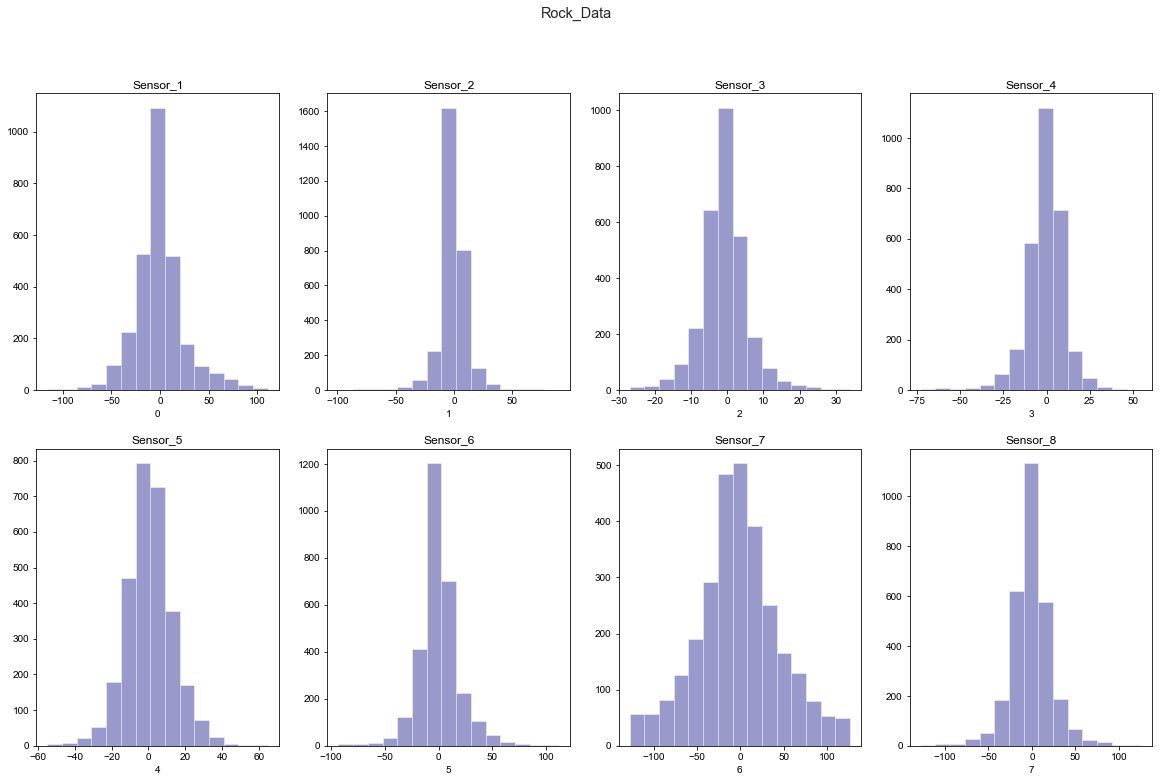

In [5]:
plot_sensor(r_data,"Rock_Data",0)


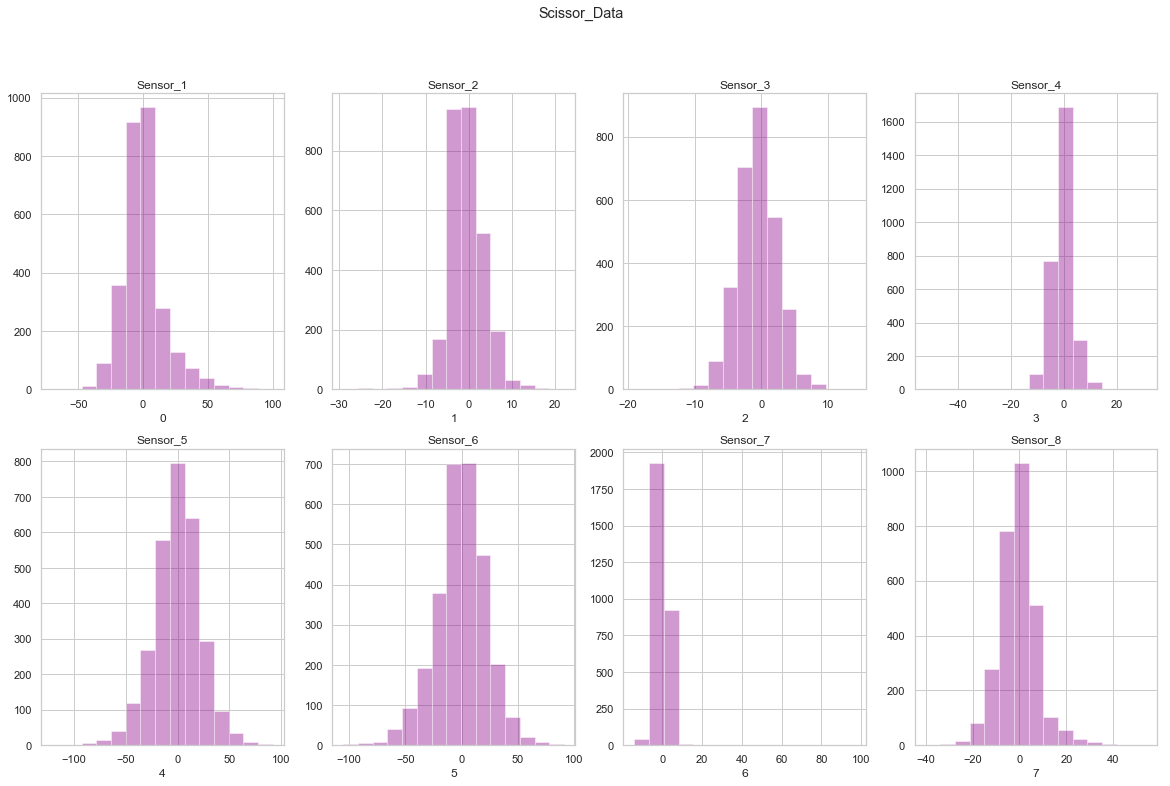

In [6]:
plot_sensor(s_data,"Scissor_Data",1)


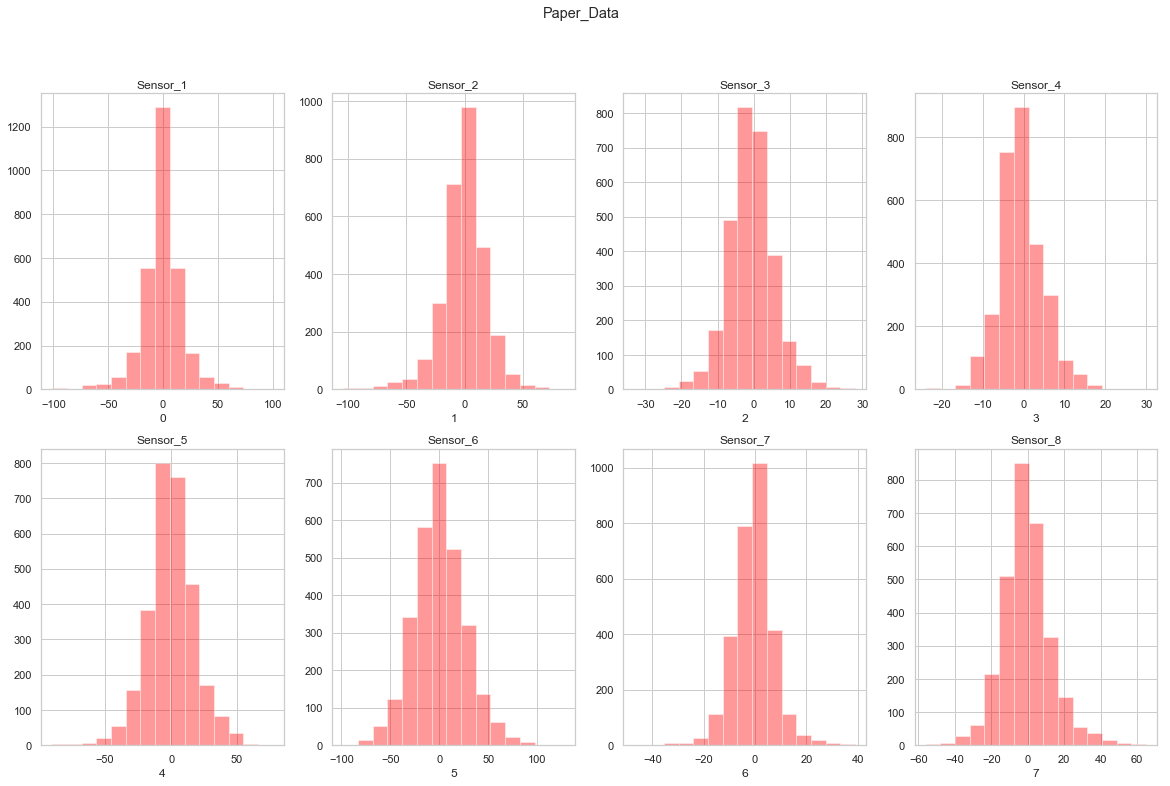

In [7]:
plot_sensor(p_data,"Paper_Data",2)


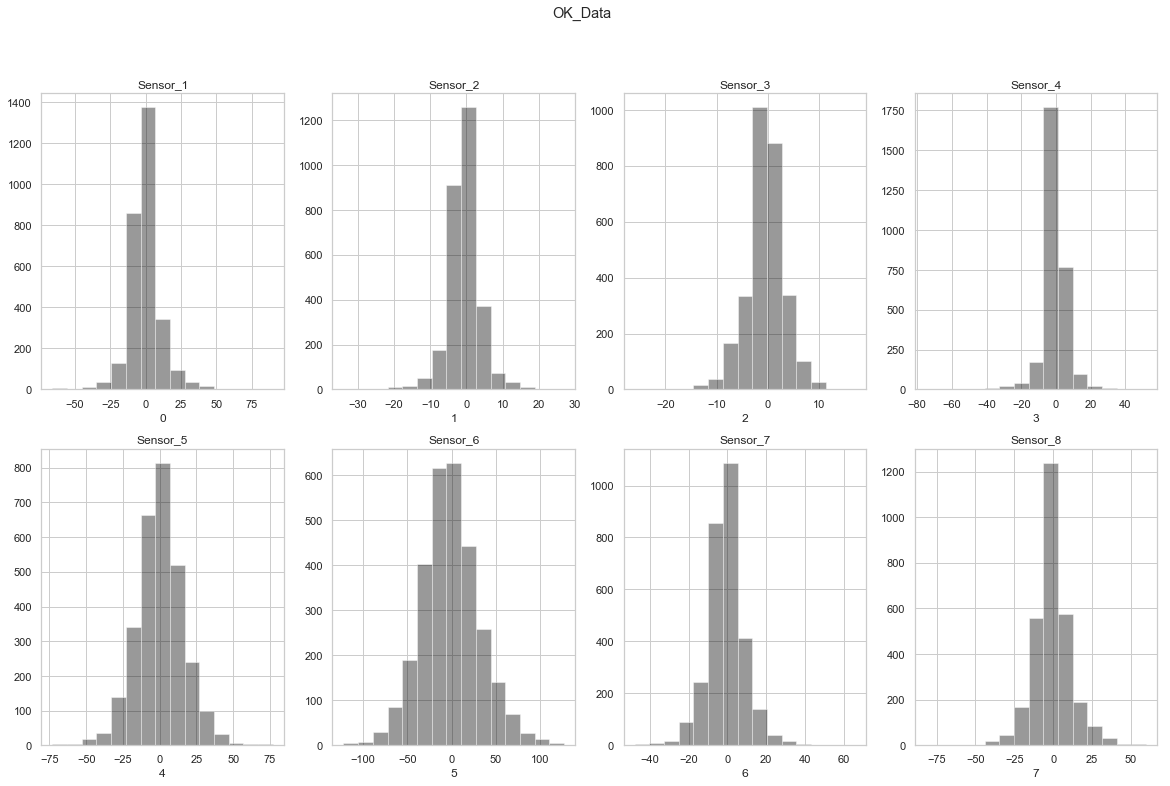

In [8]:
plot_sensor(ok_data,"OK_Data",3)

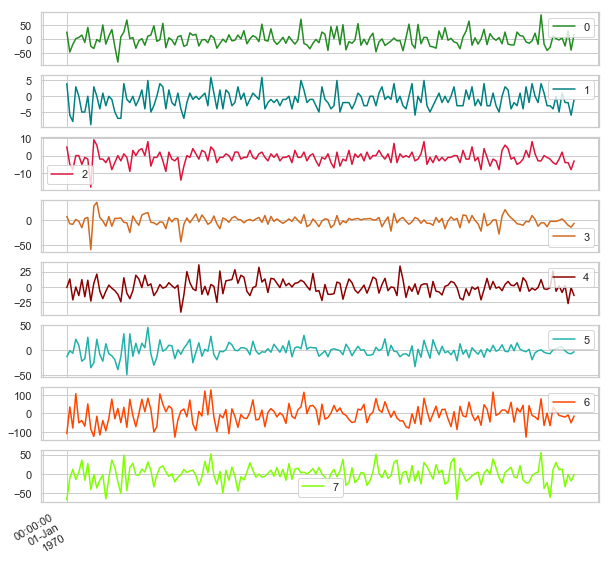

In [9]:
#Time Series
colors=["forestgreen","teal","crimson","chocolate","darkred","lightseagreen","orangered","chartreuse"]
time_rock = r_data.iloc[:,0:8]
time_rock.index=pd.to_datetime(time_rock.index)
time_rock.iloc[:170,:].plot(subplots=True,figsize=(10,10),colors=colors);

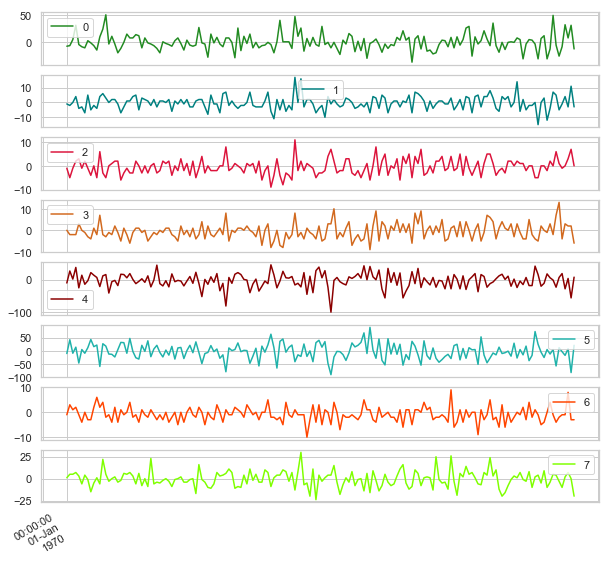

In [10]:
time_scis=s_data.iloc[:,0:8]
time_scis.index=pd.to_datetime(time_scis.index)
time_scis.iloc[:170,:].plot(subplots=True,figsize=(10,10),colors=colors);

# Data Concatenation


In [11]:
completeData=pd.concat([r_data,s_data,p_data,ok_data],ignore_index=True)
df=completeData.copy()
# column names into string 
l=[str(x) for x in range(65)]
df.columns=l
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


# Building Models 

### Naive Bayes

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X=df.drop(["64"],axis=1)
y=df["64"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

naive=GaussianNB().fit(X_train,y_train)
naive

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
y_pred=naive.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.8831335616438356


In [19]:
y_test.head()

11229    3
11658    3
2142     0
7458     2
2348     0
Name: 64, dtype: int64

In [20]:
y_pred[0:5]

array([3, 3, 0, 2, 0], dtype=int64)

# KNN 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
kneigh=KNeighborsClassifier()
k_model=kneigh.fit(X_train,y_train)
k_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
y_pred=k_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6875


# KNN Model Tuning 

In [23]:
params={"n_neighbors": np.arange(1,10)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
knn_cv.best_params_

{'n_neighbors': 9}

In [25]:
knn_model=KNeighborsClassifier(n_neighbors=9)
knn_tuned=knn_model.fit(X_train,y_train)
knn_tuned

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [26]:
y_pred=knn_tuned.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6887842465753424


# Artificial Neural Networks

In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier().fit(X_train_scaled,y_train)
mlp


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
y_pred=mlp.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9404965753424658